In [39]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

from datetime import datetime
from IPython.display import IFrame

import warnings 
warnings.filterwarnings("ignore")

In [44]:
rating_df = pd.read_csv('./data/ml-latest-small/ratings.csv')
item_df = pd.read_csv('./data/ml-latest-small/movies.csv')

In [45]:
rating_df

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [46]:
item_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


In [51]:
unique_genre_dict = {}
for index, row in item_df.iterrows():
     
    #여러 장르가 함께 있는 것을 분리하기 위해 '|' 구분자 분리하여 count
    genre_combination = row['genres']
    parsed_genre = genre_combination.split('|')
    
    #print(parsed_genre)
    #for genre in parsed_genre:
        #if genre in unique_genre_dict:
           # unique_genre_dict[genre] += 1
        #else:
            #unique_genre_dict[genre] = 1

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']
['Adventure', 'Children', 'Fantasy']
['Comedy', 'Romance']
['Comedy', 'Drama', 'Romance']
['Comedy']
['Action', 'Crime', 'Thriller']
['Comedy', 'Romance']
['Adventure', 'Children']
['Action']
['Action', 'Adventure', 'Thriller']
['Comedy', 'Drama', 'Romance']
['Comedy', 'Horror']
['Adventure', 'Animation', 'Children']
['Drama']
['Action', 'Adventure', 'Romance']
['Crime', 'Drama']
['Drama', 'Romance']
['Comedy']
['Comedy']
['Action', 'Comedy', 'Crime', 'Drama', 'Thriller']
['Comedy', 'Crime', 'Thriller']
['Crime', 'Drama', 'Horror', 'Mystery', 'Thriller']
['Action', 'Crime', 'Thriller']
['Drama', 'Sci-Fi']
['Drama', 'Romance']
['Drama']
['Children', 'Drama']
['Drama', 'Romance']
['Adventure', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi']
['Crime', 'Drama']
['Drama']
['Mystery', 'Sci-Fi', 'Thriller']
['Children', 'Drama']
['Drama', 'Romance']
['Crime', 'Drama']
['Documentary', 'IMAX']
['Children', 'Comedy']
['Comedy', 'Romance']
['Dr

In [50]:
unique_genre_dict

{'Adventure': 1117,
 'Animation': 447,
 'Children': 583,
 'Comedy': 3315,
 'Fantasy': 654,
 'Romance': 1545,
 'Drama': 4365,
 'Action': 1545,
 'Crime': 1100,
 'Thriller': 1729,
 'Horror': 877,
 'Mystery': 543,
 'Sci-Fi': 792,
 'Documentary': 495,
 'IMAX': 153,
 'War': 367,
 'Musical': 394,
 'Western': 168,
 'Film-Noir': 133,
 '(no genres listed)': 18}

In [29]:
# store full dataframe 
full_df = pd.merge(rating_df, item_df, on = 'movieId')
full_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


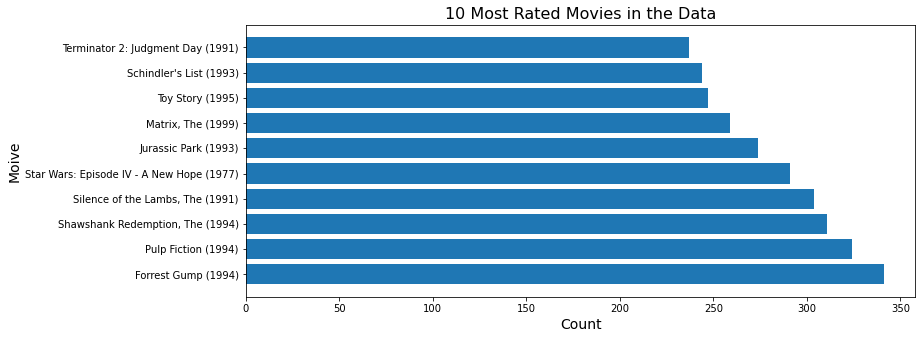

In [30]:
#가장 많은 rating을 받은 상위 영화 10개
# return number of rows associated to each title
top_ten_movies = full_df.groupby("title").size().sort_values(ascending=False)[:10]

# plot the counts
plt.figure(figsize=(12, 5))
plt.barh(y= top_ten_movies.index,
         width= top_ten_movies.values)
plt.title("10 Most Rated Movies in the Data", fontsize=16)
plt.ylabel("Moive", fontsize=14)
plt.xlabel("Count", fontsize=14)
plt.show()

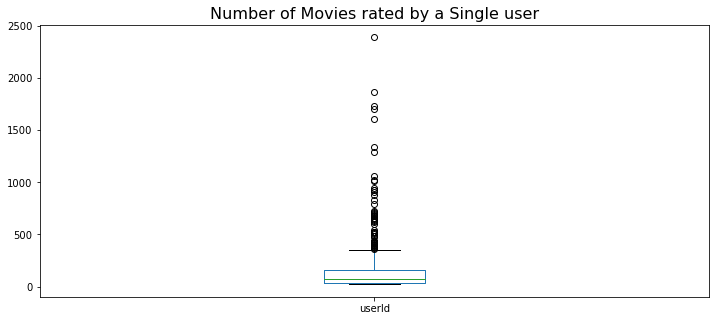

In [32]:
#Number of Movies rated by a Single user
full_df.userId.value_counts().plot.box(figsize=(12, 5))
plt.title("Number of Movies rated by a Single user", fontsize=16)
plt.show()

NameError: name 'genres' is not defined

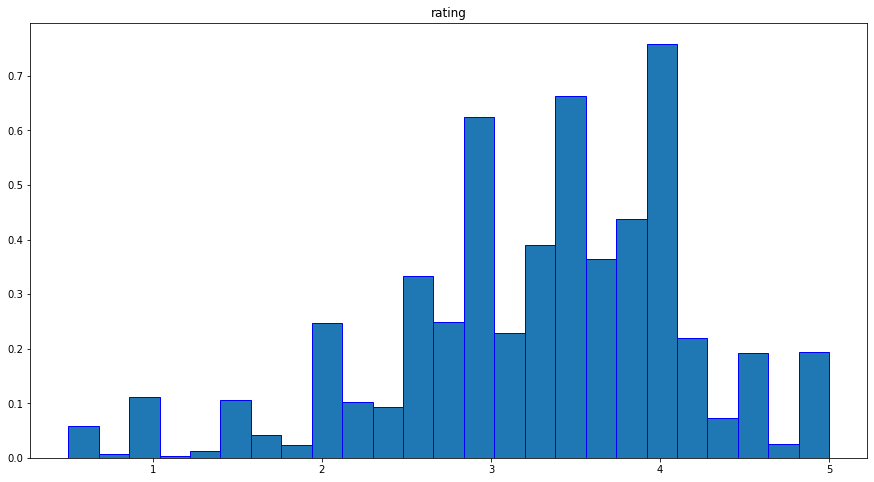

In [35]:
#이거 원본코드 output[21]인데 해내지 못했어
# https://github.com/HarilalOP/movielens-data-exploration/blob/master/src/main/code/exploratory_analysis.ipynb
df_temp = full_df[['movieId','rating']].groupby('movieId').mean()

# Histogram of all ratings
df_temp.hist(bins=25, grid=False, edgecolor='b', density=True, label ='Overall', figsize=(15,8))

# KDE plot per genre
for genre in genres:
    df_temp = full_df[full_df[genre]==True][['movieId','rating']].groupby('movieId').mean()
    df_temp.rating.plot(grid=True, alpha=0.9, kind='kde', label=genre)
plt.legend()
plt.xlim(0,5)
plt.xlabel('Rating')
plt.title('Rating Density plot')
plt.show()

In [71]:
movie_grouped_rating_info = full_df.groupby("movieId")['rating'].agg(['count','mean'])
movie_grouped_rating_info.columns = ['rated_count', 'rating_mean']

In [72]:
movie_grouped_rating_info.head(5)

,rated_count,rating_mean
movieId,,
1,247,3.872470
2,107,3.401869
3,59,3.161017
4,13,2.384615
5,56,3.267857


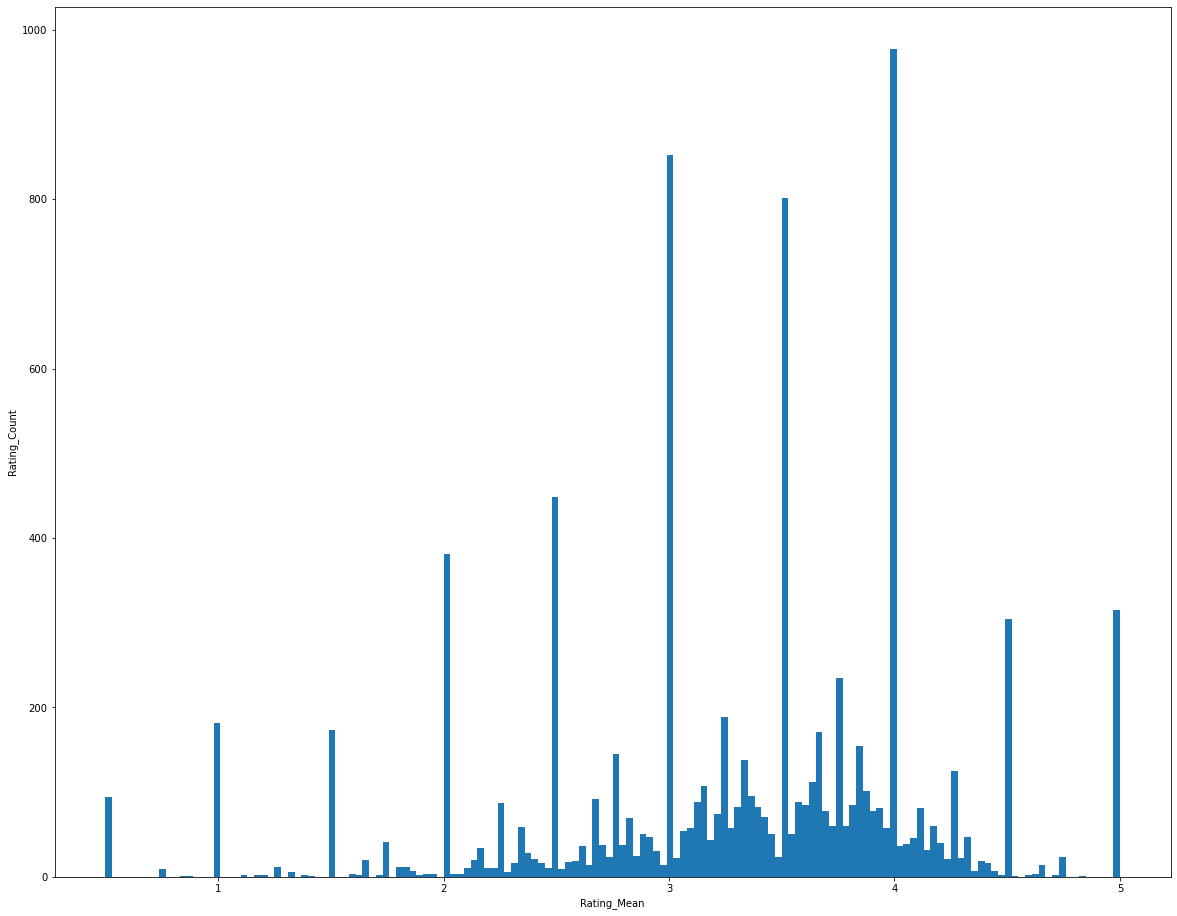

In [113]:
#모든 영화의 rating 개수와 그 평균
movie_grouped_rating_info['rating_mean'].hist(bins=150, grid=False)
plt.xlabel('Rating_Mean')
plt.ylabel('Rating_Count')
plt.show()

In [89]:
user_rating_mean = full_df.groupby("userId")['rating'].agg(['mean'])
user_rating_mean.columns = ['rating_mean']

In [90]:
user_rating_mean

,rating_mean
userId,
1,2.550000
2,3.486842
3,3.568627
4,4.348039
5,3.910000
...,...
667,3.647059
668,3.750000
669,3.351351


In [99]:
user_rating_mean=user_rating_mean.reset_index()

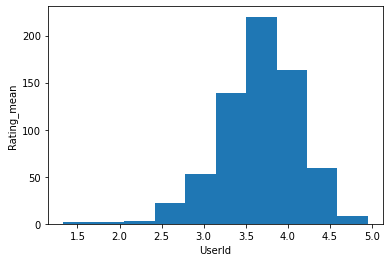

In [107]:
#이건 유저별로 준 rating 평균값인데
user_rating_mean['rating_mean'].hist(bins=150, grid=False)
plt.xlabel('Rating_mean')
plt.ylabel('UserID')
plt.show()

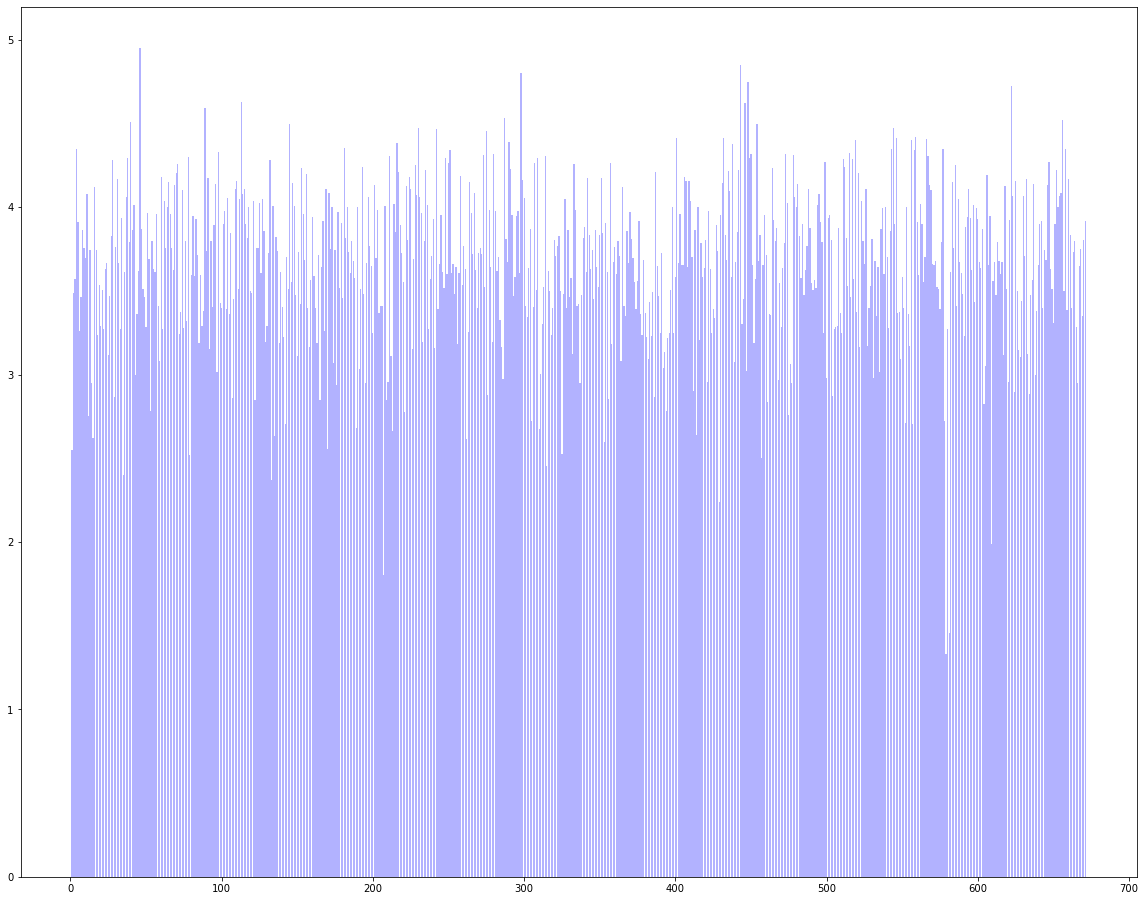

In [111]:
#이것도 위랑 같은건데 결과가 이상하게 나옴..
plt.rcParams['figure.figsize'] = [20,16]
plt.bar(user_rating_mean["userId"], user_rating_mean["rating_mean"],color='b', alpha=.3)
plt.show()